<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/RNN_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load DATA


#### Data Main Source
#####https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
!git clone "https://github.com/puraminy/mini_proj2"

fatal: destination path 'mini_proj2' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"

#github = "https://raw.githubusercontent.com/puraminy/mini_proj2/master/polution.csv"

github = "mini_proj2/polution.csv"

c=pd.read_csv(github)
data=np.asarray(c)
print(data)
np.shape(data)

[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
 [0.15995975 0.42647061 0.22950819 ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.40558836 0.         0.        ]
 [0.01006036 0.2647059  0.26229507 ... 0.41399646 0.         0.        ]
 [0.00804829 0.2647059  0.24590163 ... 0.42086649 0.         0.        ]]


(43799, 8)

In [0]:
from matplotlib import pyplot
values = c.values
# specify columns to plot
def plot_trends():
  groups = [0, 1, 2, 3, 5, 6, 7]
  i = 1
  # plot each column
  pyplot.figure()
  for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(c.columns[group], y=0.5, loc='right')
    i += 1
  pyplot.show()

# Preparing Time Series

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
def create_data(n_hours = 24, n_train = 10000):
  dataset = read_csv('mini_proj2/polution.csv', header=0)
  values = dataset.values
  
  print(np.shape(values))
  # integer encode direction
  encoder = LabelEncoder()
  values[:,4] = encoder.fit_transform(values[:,4])
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  # scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = values # scaler.fit_transform(values)
  # specify the number of lag hours
  # n_hours = 24
  n_features = 8 
  # frame as supervised learning
  reframed = series_to_supervised(scaled, n_hours, 1)

 # print(reframed[:2])
 # print(reframed.shape)

  # split into train and test sets
  values = reframed.values
   #365 * 24
  train = values[:n_train, :]
  test = values[n_train:, :]
  # split into input and outputs
  n_obs = n_hours * n_features
  train_X, train_y = train[:, :n_obs], train[:, -n_features]

  test_X, test_y = test[:, :n_obs], test[:, -n_features]
  print(train_X.shape, len(train_X), train_y.shape)
  # reshape input to be 3D [samples, timesteps, features]
    
  train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y



# Split Train & Test Data

In [0]:
import pandas as pd

def create_data2(n_hours = 24, n_train = 10000, step =1):
  n_train+=n_hours
  c=pd.read_csv(github)
  data=np.asarray(c)

  print(np.shape(data))
  
  print(data.shape[0])
  n_test = 1000 #data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]


  train_X = np.zeros([n_train-n_hours, n_hours, 8])
  train_y = np.zeros([n_train-n_hours, 1])
  for i in range (n_train-n_hours):
      train_X[i,:,:] = train[i:i+n_hours,:]
      train_y[i] = train[i+n_hours,0]

  test_X = np.zeros([n_test-n_hours, n_hours, 8])
  test_y = np.zeros([n_test-n_hours, 1])
  for i in range (n_test-n_hours):
      test_X[i,:,:] = test[i:i+n_hours,:]
      test_y[i] = test[i+n_hours,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

def create_data3(n_records = 7, n_train = 10000, n_test = -1, stride =24):
  n_train+=n_records*stride
  if n_test > 0:
    n_test+=n_records*stride
  
  c=pd.read_csv(github)
#   c = c.iloc[::-1]
#   c = [[i+x for x in range(8)] for i in range(40001,1,-1)]
  
  data=np.asarray(c)
  print(np.shape(data))
  
  print(data.shape[0])
  n_test = n_test if n_test > 0 else data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]

  n_items = n_records*stride

  train_X = np.zeros([n_train-n_items, n_records, 8])
  train_y = np.zeros([n_train-n_items, 1])
  
  
  for i in range (n_train-n_items):
#       print(i,"-",i+n_items)
      train_X[i,:,:] = train[i:i+n_items:stride,:]
      train_y[i] = train[i+n_items,0]

  test_X = np.zeros([n_test-n_items, n_records, 8])
  test_y = np.zeros([n_test-n_items, 1])
  for i in range (n_test-n_items):
      test_X[i,:,:] = test[i:i+n_items:stride,:]
      test_y[i] = test[i+n_items,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

def create_data4(n_records = 7, n_train = 10000, n_test = -1, stride =24):
  n_train+=n_records*stride
  if n_test > 0:
    n_test+=n_records*stride
  
  c=pd.read_csv(github)
  c = c.iloc[::-1]
  data=np.asarray(c)
  
#   print(data[-10:])

  print(np.shape(data))
  
  print(data.shape[0])
  n_test = n_test if n_test > 0 else data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]

  n_items = n_records*stride

  train_X = np.zeros([n_train-n_items, n_records, 8])
  train_y = np.zeros([n_train-n_items, 1])
  
  
  for i in range (n_train-n_items):
      train_X[i,:,:] = train[i+stride:i+stride+n_items:stride,:]
      train_y[i] = train[i,0]

  test_X = np.zeros([n_test-n_items, n_records, 8])
  test_y = np.zeros([n_test-n_items, 1])
  for i in range (n_test-n_items):
      test_X[i,:,:] = test[i+stride:i+stride+n_items:stride,:]
      test_y[i] = test[i,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

# train_X,train_y, test_X, test_y = create_data3(n_records=24, 
#                                                n_train=n_train,
#                                                n_test=n_test,
#                                                stride=1)
# print("========================")
# print(train_X[:1])
# print(train_y[:1])



In [6]:
a=[0,1,2,3,4,5,6,7,8,9,10]
stride = 3
records = 3
items = records * stride
print(a[0], "<==", a[0+stride:0+stride+items:stride])

0 <== [3, 6, 9]


# Model

(43799, 8)
43799
(10000, 24, 8) (10000, 1) (20000, 24, 8) (20000, 1)
Nomber of Models: 7
##################### Model model_lstm_adam_mse Hours 24 ##################


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 24)                3168      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 25        
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________
Train on 9000 samples, validate on 1000 samples
Epoch 1/25
9000/9000 [==============================] - 10s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0574 - val_loss: 0.0040 - val_mean_absolute_error: 0.0426
Epoch 2/25
9000/9000 [==============================] - 6s 696us/step - loss: 0.0026 - mean_absolute_error: 0.0348 - val_loss: 0.0024 - val_mean_absolute_

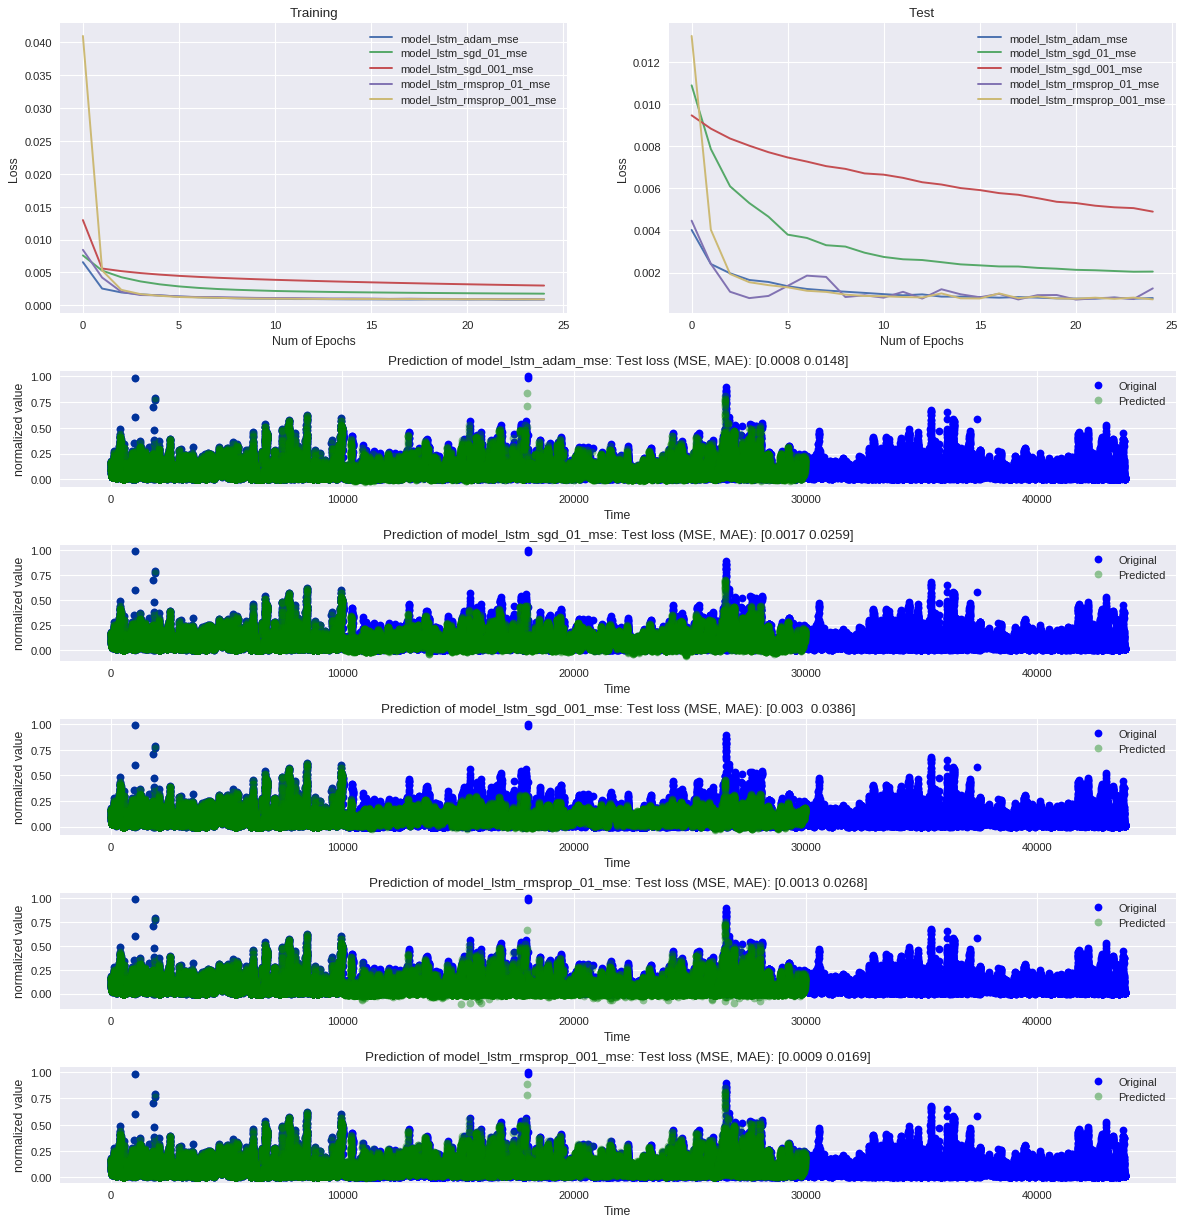

In [22]:
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU, SimpleRNN
from pylab import *
from keras.optimizers import SGD
import tensorflow as tf




def create_model(cell_type = "normal", optimizer = 'adam', loss_func='mse', dropout=0):
  if cell_type == "lstm":
    model = Sequential()   
    if dropout == 0:   
      model.add(LSTM(24, input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
      model.add(LSTM(24, batch_input_shape=(100, train_X.shape[1], train_X.shape[2]), 
                     stateful=True, 
                     dropout=dropout))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "gru":
    model = Sequential()
    model.add(GRU(30, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1, activation='linear'))
  elif cell_type == "rnn":
    model = Sequential()
    if dropout == 0:
      model.add(SimpleRNN(100, input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
      model.add(SimpleRNN(100, batch_input_shape=(100, train_X.shape[1], train_X.shape[2]), 
                     stateful=True, 
                     dropout=dropout))
    model.add(Dense(1, activation='linear'))
  else:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(10)) 
    model.add(Dense(1, activation='linear'))
  
  model.name = 'model_' + cell_type + '_' + optimizer + '_' +loss_func + ('_dropout_' +str(dropout) if dropout else '')
  if optimizer == 'rmsprop' or optimizer == 'rmsprop_001':
    optimizer = tf.train.RMSPropOptimizer(0.001)

  if optimizer == 'rmsprop_01':
    optimizer = tf.train.RMSPropOptimizer(0.01)
    
#   model.compile(loss='mae', optimizer=optimizer)
  if optimizer == 'sgd' or optimizer == 'sgd_01':
  	optimizer = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)

  if optimizer == 'sgd_001':
  	optimizer = SGD(lr=0.001, momentum=0.8, decay=0.0, nesterov=False)
    
  model.compile(loss=loss_func,
              optimizer=optimizer,
              metrics=['mae'])

  return model

n_train = 10000
n_test = 20000
n_hours = 24

# train_X,train_y, test_X, test_y = create_data2(n_hours, n_train=n_train)
train_X,train_y, test_X, test_y = create_data3(n_records=24, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=1)

models = [create_model(optimizer='adam'), #0
create_model(optimizer='sgd'), #1
create_model(optimizer='rmsprop'), #2

create_model("lstm", 'adam'), #3
create_model("lstm",'sgd_01'), #4
create_model("lstm",'rmsprop'), #5


create_model("gru", 'adam'), #6
create_model("gru", 'sgd'), #7
create_model("gru", 'rmsprop'), #8


create_model("rnn", 'adam'), #9
create_model("rnn", 'sgd_01'), #10
create_model("rnn", 'rmsprop'), #11

create_model("lstm", 'adam',dropout=0.2), #12
create_model("lstm", 'adam',dropout=0.4), #13
create_model("lstm", 'adam',dropout=0.6), #14

create_model("rnn", 'adam',dropout=0.2), #15
create_model("rnn", 'adam',dropout=0.4), #16

create_model("lstm", 'adam', 'mse'), #17
create_model("lstm",'adam', 'mae'), #18
create_model("lstm",'adam', 'logcosh'), #19

create_model("lstm", 'sgd_001'), #20

create_model("lstm", 'rmsprop_01'), #21
create_model("lstm", 'rmsprop_001')] #22


Run = [0]*len(models)
Run[3] = 1
Run[4] = 1
Run[20] = 1

Run[21] = 1
Run[22] = 1


EPOCHS =[25]*len(models)
model_index = 0

batch_size =100

legends = []

number_of_subplots = sum(Run)+2
row=2

plt.figure(num=2, figsize=(18,25), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.5,bottom=0.3)
ax1 = plt.subplot2grid((number_of_subplots,2),(0,0), colspan=1, rowspan=2)
ax2 = plt.subplot2grid((number_of_subplots,2),(0,1), colspan=1, rowspan=2)


print("Nomber of Models:", number_of_subplots)
for model in models:

  # fit network
  model_name = model.name

  if not Run[model_index]:
#     print("Skipped")
    model_index+=1
    continue

  print(f"##################### Model {model_name} Hours {n_hours} ##################")
  print("\n")
  model.summary()
   
  legends.append(model_name)

  history = model.fit(train_X, train_y, 
                      epochs=EPOCHS[model_index], 
                      batch_size=batch_size, 
#                       validation_data=(test_X, test_y), 
                      validation_split=0.1,
                      verbose=1, shuffle=True)

  
  ax1.plot(history.history['loss'], label='train')
  ax1.set_xlabel("Num of Epochs")
  ax1.set_ylabel("Loss")
  ax1.set_title("Training")
  ax1.legend(legends)


  ax2.plot(history.history['val_loss'], label='test')
  ax2.set_xlabel("Num of Epochs")
  ax2.set_ylabel("Loss")
  ax2.set_title("Test")
  ax2.legend(legends)
  
  
  test_loss = model.evaluate(test_X, test_y ,batch_size=batch_size)
  
  print("test loss:",test_loss)

  test_predictions = model.predict(test_X, batch_size=batch_size).flatten()
 
  ax3 = plt.subplot2grid((number_of_subplots,2),(row,0), colspan=2)

  ax3.set_title(f"Prediction of {model_name}: Test loss (MSE, MAE): {np.round(test_loss,4)}")
  ax3.set_xlabel('Time')
  ax3.set_ylabel('normalized value')
  ax3.legend(('Original', 'Predicted'), loc='upper right')
  ax3.plot(data[:,0], 'bo')
  ax3.plot(np.concatenate([data[:n_train,0],test_predictions]), 'go', alpha=0.4)
  ax3.legend(('Original', 'Predicted'), loc='upper right')
#   plt.savefig(model_name)

  model_index +=1
  row+=1


plt.show()

In [0]:
a = [2.55, 3.66]
print(np.round(a,1))